In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as K
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [4]:
X_train = train.drop('label',axis=1)
y_train = train['label']
X_test = test.drop('label',axis=1)
y_test = test['label']

In [5]:
n_x = X_train.shape[0]
alph = {0:'a',1:'b',2:'c',3:'d',4:'e',5:'f',6:'g',7:'h',8:'i',9:'k',10:'l',11:'m',12:'n',13:'o',14:'p',15:'q',
        16:'r',17:'s',18:'t',19:'u',20:'v',21:'w',22:'x',23:'y'}

In [6]:
X_train = X_train.values.reshape(n_x,28,28)
X_test = X_test.values.reshape(X_test.shape[0],28,28)

'g'

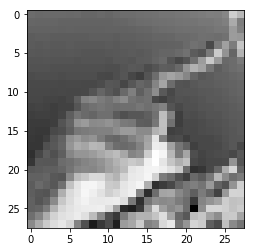

In [7]:
idx = 1
plt.imshow(X_train[idx],cmap='Greys')
alph[y_train[idx]]

In [8]:
X_train = X_train /255
X_test =X_test / 255
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [9]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy,categorical_crossentropy
from tensorflow.keras.utils import  to_categorical

In [25]:
model = K.Sequential()

model.add(Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(AveragePooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(AveragePooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(AveragePooling2D(2,2))



model.add(Flatten())
model.add(Dense(256,'relu'))
model.add(K.layers.Dropout(0.2))
model.add(Dense(256,'relu'))
model.add(K.layers.Dropout(0.2))
model.add(Dense(512,'relu'))
model.add(K.layers.Dropout(0.2))
model.add(Dense(128,'relu'))
model.add(K.layers.Dropout(0.2))
model.add(Dense(25,'softmax'))

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
average_pooling2d_9 (Average (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d_10 (Averag (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
average_pooling2d_11 (Averag (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [27]:
model.compile(Adam(),categorical_crossentropy,['accuracy'])

In [28]:
def map_y(y):
    new = y.copy()
    for i,x in enumerate(y):
        if x>9:
            new[i] -=1
    return new

In [29]:
map_y(y_train)
to_categorical(y_train).shape

(27455, 25)

In [30]:
hist = model.fit(X_train,to_categorical(y_train),epochs=20,batch_size=200,validation_data=(X_test,to_categorical(y_test)))

Train on 27455 samples, validate on 7172 samples
Epoch 1/20
27455/27455 [==============================] - 4s 138us/sample - loss: 2.9750 - accuracy: 0.0928 - val_loss: 2.3875 - val_accuracy: 0.2216
Epoch 2/20
27455/27455 [==============================] - 3s 101us/sample - loss: 1.9196 - accuracy: 0.3381 - val_loss: 1.5385 - val_accuracy: 0.4695
Epoch 3/20
27455/27455 [==============================] - 3s 102us/sample - loss: 1.2244 - accuracy: 0.5632 - val_loss: 0.9152 - val_accuracy: 0.6461
Epoch 4/20
27455/27455 [==============================] - 3s 100us/sample - loss: 0.7573 - accuracy: 0.7245 - val_loss: 0.7612 - val_accuracy: 0.7351
Epoch 5/20
27455/27455 [==============================] - 3s 101us/sample - loss: 0.5206 - accuracy: 0.8097 - val_loss: 0.5281 - val_accuracy: 0.8160
Epoch 6/20
27455/27455 [==============================] - 3s 102us/sample - loss: 0.3736 - accuracy: 0.8663 - val_loss: 0.4103 - val_accuracy: 0.8461
Epoch 7/20
27455/27455 [===========================

In [31]:
map_y(y_test)

0        6
1        5
2        9
3        0
4        3
5       20
6        9
7       13
8        3
9        7
10       8
11       8
12      20
13      11
14       7
15       4
16      21
17       0
18       7
19       7
20       2
21       0
22      20
23       4
24       9
25      14
26       2
27      14
28       7
29       1
        ..
7142     0
7143    13
7144    11
7145     4
7146    17
7147    15
7148     7
7149     3
7150    14
7151    18
7152     1
7153    11
7154     8
7155    22
7156    18
7157     7
7158    11
7159     3
7160    18
7161    23
7162     9
7163     4
7164    13
7165     8
7166    11
7167     1
7168    11
7169     2
7170     4
7171     2
Name: label, Length: 7172, dtype: int64

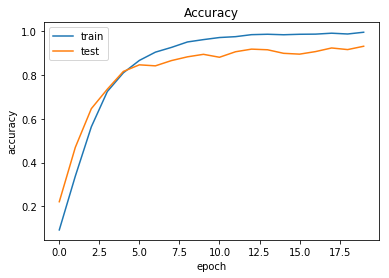

In [32]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [33]:
pred = model.predict(X_test)

In [34]:
pred =pred.round()

Final accuracy on test set

In [35]:
from sklearn.metrics import classification_report,accuracy_score
print(accuracy_score(to_categorical(y_test),pred))

0.92930842163971


In [36]:
print(classification_report(to_categorical(y_test),pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       331
           1       1.00      0.97      0.98       432
           2       0.94      1.00      0.97       310
           3       0.94      0.99      0.97       245
           4       0.86      1.00      0.92       498
           5       1.00      1.00      1.00       247
           6       0.81      0.94      0.87       348
           7       0.97      0.89      0.93       436
           8       0.88      1.00      0.93       288
           9       0.00      0.00      0.00         0
          10       1.00      0.90      0.95       331
          11       0.92      1.00      0.96       209
          12       0.96      0.80      0.87       394
          13       1.00      0.89      0.94       291
          14       1.00      0.86      0.92       246
          15       1.00      1.00      1.00       347
          16       0.96      1.00      0.98       164
          17       0.89    

r
r


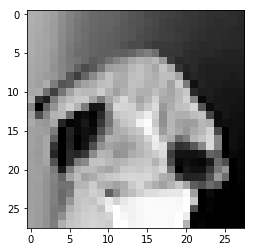

In [37]:
idx = 54
print(alph[y_test[idx]])
print(alph[pred[idx].argmax()])
plt.imshow(X_test[idx].reshape(28,28),cmap='Greys')